In [1]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
# import PyNIO as Nio  # deprecated
import pandas as pd
import glob
from scipy.stats import *
from copy import deepcopy
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm

from scipy.optimize import curve_fit
import seaborn as sns
from useful_func_cy import * 

import cartopy.crs as ccrs   #..projection method
import cartopy.feature as cfeat
import matplotlib.ticker as mticker
from matplotlib import cm
from copy import deepcopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
# deck_nas  = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM2', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MRIESM20', 'MIROC6', 'SAM0']
#..deck_nas  =    ['CESM2']
exp = 'piControl'

# CMIP6: 31 (30: BCCCSMCM2MR)
AWICM11MR = {'modn': 'AWI-CM-1-1-MR', 'consort': 'AWI', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
BCCCSMCM2MR = {'modn': 'BCC-CSM2-MR', 'consort': 'BCC', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
BCCESM1 = {'modn': 'BCC-ESM1', 'consort': 'BCC', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CAMSCSM1 = {'modn': 'CAMS-CSM1-0', 'consort': 'CAMS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CMCCCM2SR5 = {'modn': 'CMCC-CM2-SR5', 'consort': 'CMCC', 'cmip': 'cmip6', 
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2 = {'modn': 'CESM2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2FV2 = {'modn': 'CESM2-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCM = {'modn': 'CESM2-WACCM', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCMFV2 = {'modn': 'CESM2-WACCM-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

CNRMCM61 = {'modn': 'CNRM-CM6-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMCM61HR = {'modn': 'CNRM-CM6-1-HR', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMESM21 = {'modn': 'CNRM-ESM2-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CanESM5 = {'modn': 'CanESM5', 'consort': 'CCCma', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
E3SM10 = {'modn': 'E3SM-1-0', 'consort': 'E3SM-Project', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

ECEarth3 = {'modn': 'EC-Earth3', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
ECEarth3Veg = {'modn': 'EC-Earth3-Veg', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

FGOALSg3 = {'modn': 'FGOALS-g3', 'consort': 'CAS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21G = {'modn': 'GISS-E2-1-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21H = {'modn': 'GISS-E2-1-H', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE22G = {'modn': 'GISS-E2-2-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GFDLCM4 = {'modn': 'GFDL-CM4', 'consort': 'NOAA-GFDL', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
# HADGEM3 = {'modn': 'HadGEM3-GC31-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
#             'exper': 'piControl', 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}   #..missing 'wap' in 'piControl' exp(Daniel says that HadGEM3-GC31 not using p-level, so doesn't have variables on p-level
INM_CM48 = {'modn': 'INM-CM4-8', 'consort': 'INM', 'cmip': 'cmip6', 
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
IPSLCM6ALR = {'modn': 'IPSL-CM6A-LR', 'consort': 'IPSL', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
MIROCES2L = {'modn': 'MIROC-ES2L', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gn', "typevar": 'Amon'}
MIROC6 = {'modn': 'MIROC6', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MPIESM12LR = {'modn': 'MPI-ESM1-2-LR', 'consort': 'MPI-M', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MRIESM20 = {'modn': 'MRI-ESM2-0', 'consort': 'MRI', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NESM3 = {'modn': 'NESM3', 'consort': 'NUIST', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NorESM2MM = {'modn': 'NorESM2-MM', 'consort': 'NCC', 'cmip': 'cmip6',
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
SAM0 = {'modn': 'SAM0-UNICON', 'consort': 'SNU', 'cmip': 'cmip6', 
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
TaiESM1 = {'modn': 'TaiESM1', 'consort': 'AS-RCEC', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

# CMIP5: 20 (18, ACCESS10, ACCESS13)
ACCESS10 = {'modn': 'ACCESS1-0', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
ACCESS13 = {'modn': 'ACCESS1-3', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
BNUESM = {'modn': 'BNU-ESM', 'consort': 'BNU', 'cmip': 'cmip5',
          'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

CCSM4 = {'modn': 'CCSM4', 'consort': 'NCAR', 'cmip': 'cmip5',
             'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CNRMCM5 = {'modn': 'CNRM-CM5', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CSIRO_Mk360 = {'modn': 'CSIRO-Mk3-6-0', 'consort': 'CSIRO-QCCCE', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CanESM2 = {'modn': 'CanESM2', 'consort': 'CCCma', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
FGOALSg2 = {'modn': 'FGOALS-g2', 'consort': 'LASG-CESS', 'cmip': 'cmip5',   # missing 'prw' in piControl
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
FGOALSs2 = {'modn': 'FGOALS-s2', 'consort': 'LASG-IAP', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLCM3 = {'modn': 'GFDL-CM3', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GISSE2H = {'modn': 'GISS-E2-H', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GISSE2R = {'modn': 'GISS-E2-R', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
IPSLCM5ALR = {'modn': 'IPSL-CM5A-LR', 'consort': 'IPSL', 'cmip': 'cmip5',
               'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MIROC5 = {'modn': 'MIROC5', 'consort': 'MIROC', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MPIESMMR = {'modn': 'MPI-ESM-MR', 'consort': 'MPI-M', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
NorESM1M = {'modn': 'NorESM1-M', 'consort': 'NCC', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

MIROCESM = {'modn': 'MIROC-ESM', 'consort': 'MIROC', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MRICGCM3 = {'modn': 'MRI-CGCM3', 'consort': 'MRI', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MPIESMLR = {'modn': 'MPI-ESM-LR', 'consort': 'MPI-M', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
bcccsm11 = {'modn': 'bcc-csm1-1', 'consort': 'BCC', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLESM2G = {'modn': 'GFDL-ESM2G', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLESM2M = {'modn': 'GFDL-ESM2M', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5', 
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}


In [3]:
deck2 = [CanESM5, E3SM10, CESM2FV2, CESM2, CNRMCM61, CESM2WACCMFV2, CNRMESM21, NESM3, IPSLCM6ALR, CESM2WACCM, MIROCESM, TaiESM1, ECEarth3Veg, CNRMCM61HR, ECEarth3, 
         FGOALSs2, IPSLCM5ALR, CSIRO_Mk360, BNUESM, GFDLCM3, GFDLCM4, SAM0, CanESM2, MPIESMLR, CMCCCM2SR5, MPIESMMR, FGOALSg2, BCCESM1, CNRMCM5, AWICM11MR, MRIESM20, 
          GISSE21H, MPIESM12LR, CCSM4, NorESM1M, FGOALSg3, bcccsm11, MIROC5, GISSE21G, MIROCES2L, MRICGCM3, MIROC6, NorESM2MM, GFDLESM2M, GFDLESM2G, GISSE22G, GISSE21H, CAMSCSM1, GISSE2R, INM_CM48]

deck_nas2 = ['CanESM5', 'E3SM10', 'CESM2FV2', 'CESM2', 'CNRMCM61', 'CESM2WACCMFV2', 'CNRMESM21', 'NESM3', 'IPSLCM6ALR', 'CESM2WACCM', 'MIROCESM', 'TaiESM1', 'ECEarth3Veg', 'CNRMCM61HR', 'ECEarth3', 
         'FGOALSs2', 'IPSLCM5ALR', 'CSIRO_Mk360', 'BNUESM', 'GFDLCM3', 'GFDLCM4', 'SAM0', 'CanESM2', 'MPIESMLR', 'CMCCCM2SR5', 'MPIESMMR', 'FGOALSg2', 'BCCESM1', 'CNRMCM5', 'AWICM11MR', 'MRIESM20', 
          'GISSE21H', 'MPIESM12LR', 'CCSM4', 'NorESM1M', 'FGOALSg3', 'bcccsm11', 'MIROC5', 'GISSE21G', 'MIROCES2L', 'MRICGCM3', 'MIROC6', 'NorESM2MM', 'GFDLESM2M', 'GFDLESM2G', 'GISSE22G', 'GISSE21H', 'CAMSCSM1', 'GISSE2R', 'INM_CM48']

deck3 = [CanESM5, E3SM10, CESM2FV2, CESM2, CNRMCM61, CESM2WACCMFV2, CNRMESM21, NESM3, IPSLCM6ALR, CESM2WACCM, MIROCESM, TaiESM1, ECEarth3Veg, CNRMCM61HR, ECEarth3, 
         FGOALSs2, IPSLCM5ALR, CSIRO_Mk360, BNUESM, GFDLCM3, GFDLCM4, SAM0, CanESM2, MPIESMLR, CMCCCM2SR5, MPIESMMR, FGOALSg2, BCCESM1, CNRMCM5, AWICM11MR, MRIESM20, 
          GISSE21H, MPIESM12LR, CCSM4, NorESM1M, FGOALSg3, bcccsm11, MIROC5, GISSE21G, MIROCES2L, MRICGCM3, MIROC6, NorESM2MM, GFDLESM2M, GFDLESM2G, GISSE22G, GISSE21H, CAMSCSM1, GISSE2R, INM_CM48]

deck_nas3 = ['CanESM5', 'E3SM10', 'CESM2FV2', 'CESM2', 'CNRMCM61', 'CESM2WACCMFV2', 'CNRMESM21', 'NESM3', 'IPSLCM6ALR', 'CESM2WACCM', 'MIROCESM', 'TaiESM1', 'ECEarth3Veg', 'CNRMCM61HR', 'ECEarth3', 
         'FGOALSs2', 'IPSLCM5ALR', 'CSIRO_Mk360', 'BNUESM', 'GFDLCM3', 'GFDLCM4', 'SAM0', 'CanESM2', 'MPIESMLR', 'CMCCCM2SR5', 'MPIESMMR', 'FGOALSg2', 'BCCESM1', 'CNRMCM5', 'AWICM11MR', 'MRIESM20', 
          'GISSE21H', 'MPIESM12LR', 'CCSM4', 'NorESM1M', 'FGOALSg3', 'bcccsm11', 'MIROC5', 'GISSE21G', 'MIROCES2L', 'MRICGCM3', 'MIROC6', 'NorESM2MM', 'GFDLESM2M', 'GFDLESM2G', 'GISSE22G', 'GISSE21H', 'CAMSCSM1', 'GISSE2R', 'INM_CM48']

path1 = '/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/'

path6 = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Tan_et_al_2023_JGR-A__/plot_file/'

In [4]:
## Read two Regimes (Hot,Cold) data

output_ARRAY = {}   # storage output file
output_intermedia = {}   # storage the 'rawdata_dict'

output_dict0_PI = {}
output_dict0_abr = {}

output_GMT = {}
output_2lrm_predict = {}  # dict, store annualy, area_meaned prediction of LWP
output_2lrm_report = {}  # dict, store annually, area_meaned actual values of GCMs LWP
output_2lrm_coef_LWP = {}
output_2lrm_dict_Albedo = {}  # Coefficients of 2 regimes's albedo trained by report 'LWP' data
# output_2lrm_coef_albedo_lL = {}

# Raw data
output_2lrm_yr_bin_abr = {}
output_2lrm_yr_bin_PI = {}
output_2lrm_mon_bin_abr = {}
output_2lrm_mon_bin_PI = {}

# Metric raw data in specific units:
shape_mon_pi = {}
shape_mon_abr = {}
output_2lrm_metric_actual_PI = {}
output_2lrm_metric_actual_abr = {}

# Statistic metrics of PI:
output_Mean_training = {}
output_Stdev_training = {}

# Predict metric data in specific units:
output_2lrm_mon_bin_LWPpredi_PI = {}
output_2lrm_mon_bin_LWPpredi_abr = {}

# Index for regime(s): Only for 2lrm
output_ind_Cold_PI = {}
output_ind_Hot_PI = {}
output_ind_Cold_abr = {}
output_ind_Hot_abr = {}

Tr_sst =  0.0

for i in range(len(deck2)):
    # print("i", i)
    folder_2lrm = glob.glob(path1+deck2[i]['modn'] + '_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest' + '*' + '_dats.npz')
    # print(len(folder_2lrm))
    
    if len(folder_2lrm) == 4:
        if (len(folder_2lrm[0]) < len(folder_2lrm[1])) & (len(folder_2lrm[0]) < len(folder_2lrm[2])) & (len(folder_2lrm[0]) < len(folder_2lrm[3])):
            folder_best2lrm = folder_2lrm[0]
        elif (len(folder_2lrm[1]) < len(folder_2lrm[0])) & (len(folder_2lrm[1]) < len(folder_2lrm[2])) & (len(folder_2lrm[1]) < len(folder_2lrm[3])):
            folder_best2lrm = folder_2lrm[1]
        elif (len(folder_2lrm[2]) < len(folder_2lrm[0])) & (len(folder_2lrm[2]) < len(folder_2lrm[1])) & (len(folder_2lrm[2]) < len(folder_2lrm[3])):
            folder_best2lrm = folder_2lrm[2]
        else:
            folder_best2lrm = folder_2lrm[3]
        print(folder_best2lrm)
    
    elif len(folder_2lrm) == 3:
        if (len(folder_2lrm[1]) <  len(folder_2lrm[0])) & (len(folder_2lrm[1]) <  len(folder_2lrm[2])):
            folder_best2lrm = folder_2lrm[1]
        elif (len(folder_2lrm[0]) <  len(folder_2lrm[1])) & (len(folder_2lrm[0]) <  len(folder_2lrm[2])):
            folder_best2lrm = folder_2lrm[0]
        else:
            folder_best2lrm = folder_2lrm[2]
        print(folder_best2lrm)
    
    elif len(folder_2lrm) == 2:
        if len(folder_2lrm[1]) <  len(folder_2lrm[0]):
            folder_best2lrm = folder_2lrm[1]
        else:
            folder_best2lrm = folder_2lrm[0]
        print(folder_best2lrm)
        
    else:
        output_ARRAY[deck_nas2[i]] = load(folder_2lrm[0], allow_pickle = True)  #+'_'+str(Tr_sst)
        print(folder_2lrm[0])
    
    output_ARRAY[deck_nas2[i]] =  load(folder_best2lrm, allow_pickle=True)  #+'_'+str(Tr_sst)

    # output_ARRAY[deck_nas2[i]] = load(folder_2lrm[0], allow_pickle = True)  #+'_'+str(Tr_sst)
    output_intermedia[deck_nas2[i]] = output_ARRAY[deck_nas2[i]]['rawdata_dict']
    
    output_GMT[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['GMT']
    output_2lrm_predict[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['predicted_metrics']
    output_2lrm_report[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['report_metrics']

    output_dict0_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['dict1_PI_var']
    output_dict0_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['dict1_abr_var']
    
    output_2lrm_coef_LWP[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['Coef_dict']
    output_2lrm_dict_Albedo[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['coef_dict_Albedo_pi']
    
    # Monthly data
    output_2lrm_mon_bin_PI[deck_nas2[i]] = output_dict0_PI[deck_nas2[i]]['dict1_mon_bin_PI']
    output_2lrm_mon_bin_abr[deck_nas2[i]] = output_dict0_abr[deck_nas2[i]]['dict1_mon_bin_abr']
    # Annually data
    output_2lrm_yr_bin_PI[deck_nas2[i]] = output_dict0_PI[deck_nas2[i]]['dict1_yr_bin_PI']
    output_2lrm_yr_bin_abr[deck_nas2[i]] = output_dict0_abr[deck_nas2[i]]['dict1_yr_bin_abr']
    
    # Flattened Metric monthly mean bin data
    shape_mon_pi[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['shape_mon_PI_3']
    shape_mon_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['shape_mon_abr_3']
    output_2lrm_metric_actual_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['metric_training']
    output_2lrm_metric_actual_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['metric_predict']
    
    # Flattened Predicted monthly bin data
    output_2lrm_mon_bin_LWPpredi_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['LWP_predi_bin_PI']
    output_2lrm_mon_bin_LWPpredi_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['LWP_predi_bin_abr']

    # Statistic metrics of PI:
    output_Mean_training[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['Mean_training']
    output_Stdev_training[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['Stdev_training']
    
    # Indice for Regimes
    output_ind_Hot_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Hot_PI']
    output_ind_Cold_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Cold_PI']

    output_ind_Hot_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Hot_abr']
    output_ind_Cold_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Cold_abr']

print('Down read 2-LRM.')

/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CanESM5_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest-12.91_dats.npz
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/E3SM-1-0_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest-0.95_dats.npz
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2-FV2_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest-0.42_dats.npz
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest0.28_dats.npz
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CNRM-CM6-1_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest-3.84_dats.npz
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2-WACCM-FV2_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest-0.45_dats.npz
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CNRM-ESM2-1_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest-1.55_dats.npz
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/NESM3_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_

In [5]:
# prep step1: coef_array

# calc data (monthly) standard deviation:
coef1 = []
coef2 = []
# stcoef1  = full((len(deck2), 4), 0)
# stcoef2  = full((len(deck2), 4), 0)

itcp1 = []
itcp2 = []

coef_array_50 = []

# # true LWP response to warming, this array storaged the four regimes response:
# dX_dTg_modelresponse1 = full(len(deck2), 0.000)
# dX_dTg_modelresponse2 = full(len(deck2), 0.000)
# dX_dTg_modelresponse3 = full(len(deck2), 0.000)
# dX_dTg_modelresponse4 = full(len(deck2), 0.000)

# Retrieved the 2-lrm coefficients:
for i in range(len(deck2)):
    
    a_lt = output_2lrm_coef_LWP[deck_nas2[i]][0][0].copy()
    a_le = output_2lrm_coef_LWP[deck_nas2[i]][1][0].copy()
    
    a0_lt = output_2lrm_coef_LWP[deck_nas2[i]][0][1]
    a0_le = output_2lrm_coef_LWP[deck_nas2[i]][1][1]
    
    coef_array_50.append([[a_lt, a0_lt], [a_le, a0_le]])
    # print(coef_array_50)
    
    # print(m, t, e, f)
    coef1.append(a_lt)
    coef2.append(a_le)
    
    itcp1.append(array(a0_lt))
    itcp2.append(array(a0_le))

coef_array_50 = np.asarray(coef_array_50)
# print(coef_array_50[:,0, 0])

In [6]:
# prep step 2: X_dict

X_dict_50_PI  = {}
X_dict_50_abr = {}

for i in arange(len(deck_nas2)):
    
    X_dict_PI = {}
    X_dict_PI['SST'] = output_2lrm_metric_actual_PI[deck_nas2[i]]['SST'].reshape(shape_mon_pi[deck_nas2[i]])
    X_dict_PI['p_e'] = output_2lrm_metric_actual_PI[deck_nas2[i]]['p_e'].reshape(shape_mon_pi[deck_nas2[i]])
    X_dict_PI['LTS'] = output_2lrm_metric_actual_PI[deck_nas2[i]]['LTS'].reshape(shape_mon_pi[deck_nas2[i]])
    X_dict_PI['SUB'] = output_2lrm_metric_actual_PI[deck_nas2[i]]['SUB'].reshape(shape_mon_pi[deck_nas2[i]])
    
    X_dict_abr = {}
    X_dict_abr['SST'] = output_2lrm_metric_actual_abr[deck_nas2[i]]['SST'].reshape(shape_mon_abr[deck_nas2[i]])
    X_dict_abr['p_e'] = output_2lrm_metric_actual_abr[deck_nas2[i]]['p_e'].reshape(shape_mon_abr[deck_nas2[i]])
    X_dict_abr['LTS'] = output_2lrm_metric_actual_abr[deck_nas2[i]]['LTS'].reshape(shape_mon_abr[deck_nas2[i]])
    X_dict_abr['SUB'] = output_2lrm_metric_actual_abr[deck_nas2[i]]['SUB'].reshape(shape_mon_abr[deck_nas2[i]])
    
    
    X_dict_50_PI[deck_nas2[i]] = X_dict_PI
    X_dict_50_abr[deck_nas2[i]] = X_dict_abr

In [7]:
# Building functions:

import numpy as np

def rdlrm_2_predict_modify(X_dict, coef_array, cut_off1, predictant = 'LWP', predictor = ['SST', 'p_e', 'LTS', 'SUB'], r = 2):
    # 'predict_dict' is a dictionary to store the 'predict_label_LWP' and 'predict_value_LWP' (for CCF1, 2, 3, 4,.. and the intercept);
    predict_dict = {}

    # 'predict_label_LWP' is an array to store the regimes_lebel of each grid points in 3-D structure of data array
    predict_label_LWP = np.zeros((X_dict['p_e'].shape[0], X_dict['p_e'].shape[1], X_dict['p_e'].shape[2]))

    # 'predict_value_LWP' is an array to store the predicted LWP
    predict_value_LWP = [X_dict['SST'] *1., X_dict['p_e'] *1., X_dict['LTS'] *1., X_dict['SUB'] *1.,
                         np.ones((X_dict['SST'].shape[0], X_dict['SST'].shape[1], X_dict['SST'].shape[2]))]
    print(np.asarray(predict_value_LWP).shape)

    
    # LOOP THROUGH REGIMES ('2'):
    # split data with skin Temperature (SST) Larger\Equal and Less than Cut_off1
    
    ind_hot = X_dict['SST'] >= cut_off1
    ind_cold = X_dict['SST'] < cut_off1 
    # 
    # ind_up   = X_dict['SUB'] <= cut_off2
    # ind_down = X_dict['SUB'] > cut_off2
    ind6 = ind_hot
    ind7 = ind_cold

    Regimes = [ind7, ind6]
    # print(' Total # of regime', len(Regimes))
    
    for i in range(len(Regimes)):
        # print('current # of regimes', i)
        ind = Regimes[i]
        
        predict_label_LWP[ind] = i + 1
        
        # LOOP THROUGH Cloud Controlling Factors ('4') and intercepts ('+1'):
        
        for j in range(len(predict_value_LWP)):
            # print('current # of ccfs', j)
            if j < 4: 
                predict_value_LWP[j][ind] = 1000. * (coef_array[i,0][j] * predict_value_LWP[j][ind])
            elif j == (len(predict_value_LWP)  - 1): 
                predict_value_LWP[j][ind] = 1000. * (coef_array[i,1] * predict_value_LWP[j][ind])
    
    # Detecting nan values in the CCFs metrics
    Z = X_dict['LTS'] * 1. 

    for k in range(len(predict_value_LWP)):
        Z = Z * predict_value_LWP[k]
    ind_false = np.isnan(Z)
    
    ind_true = np.logical_not(ind_false)
    print('ratio of non-nan in raw GCM data: ', np.asarray(np.nonzero(ind_true==True)).shape[1] / len(X_dict['LTS'].flatten()))  #.. ratio of 'non-nan'.
    
    # match all the points with the same 'NaN' POSITIONS:
    predict_label_LWP[ind_false] = 0
    for l in range(len(predict_value_LWP)): 

        predict_value_LWP[l][ind_false] = np.nan
    
    
    # print("predict_value_LWP ", predict_value_LWP)
    # print("label", predict_label_LWP)  # '1' for 'Cold' regime, '2' for 'Hot' regime
    
    predict_dict['label'] = predict_label_LWP
    predict_dict['value'] = np.asarray(predict_value_LWP)

    return predict_dict

In [8]:
# daniel's method: after April 15th
# find the model wanted:
WD = '/glade/scratch/chuyan/CMIP_output/'
a = 3

## for 4lrm:
abr_str_mon = 121*12
abr_end_mon = 140*12

folder =  glob.glob(WD+ deck_nas2[a]+'__'+'STAT_pi+abr_'+'22x_31y_Sep9th_anomalies'+ '.npz') 
# print(folder)
output_ARRAY =  np.load(folder[0], allow_pickle=True)  # str(TR_sst)
TR_sst1 = output_ARRAY['TR_minabias_SST']
TR_sub1 = output_ARRAY['TR_minabias_SUB']
TR_sst2 = output_ARRAY['TR_maxR2_SST']
TR_sub2 = output_ARRAY['TR_maxR2_SUB']
print('MODEL: ', deck2[a]['modn'])
print('TR_sst= ', TR_sst2)
print('TR_sub= ', TR_sub2)

# # CESM2:
# TR_sst = 269.42
# TR_sub = 0.006


predict_dict1 = rdlrm_2_predict_modify(X_dict_50_abr[deck_nas2[a]], coef_array_50[a,:,:], cut_off1 = TR_sst2, predictant = 'LWP', predictor = ['SST', 'p_e', 'LTS', 'SUB'], r = 2)
predict_dict2 = rdlrm_2_predict_modify(X_dict_50_PI[deck_nas2[a]], coef_array_50[a,:,:], cut_off1 = TR_sst2, predictant = 'LWP', predictor = ['SST', 'p_e', 'LTS', 'SUB'], r = 2)


MODEL:  CESM2
TR_sst=  0.2841552826285252
TR_sub=  0.01707090606822593
(5, 1802, 9, 72)
ratio of non-nan in raw GCM data:  0.9143235910716487
(5, 1188, 9, 72)
ratio of non-nan in raw GCM data:  0.9102937814357568


In [9]:
predict_label_abr = predict_dict1['label']
predict_value_abr = predict_dict1['value']

predict_label_PI = predict_dict2['label']
predict_value_PI = predict_dict2['value']
# print(predict_label_PI)
print(np.array(np.nonzero( (predict_label_abr == 0.0) ==True) ).shape)

(3, 100044)


number of points to be this regime:  (3, 316468)
number of points to be this regime:  (3, 751184)
(2, 1802)


Text(0.5, 1.0, '$Time\\ Series\\ Decomposition $ of CESM2')

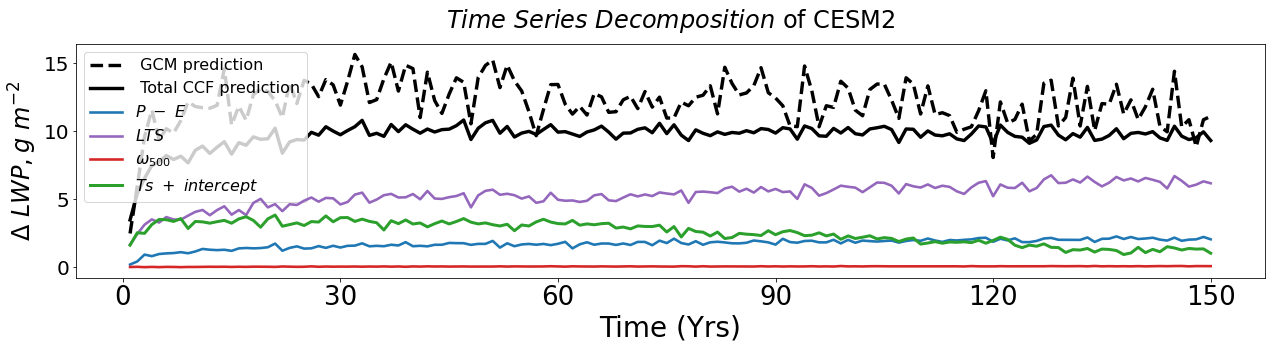

In [10]:
# whole (component) contribution plot in Times:
parameters = {'axes.labelsize': 24, 'legend.fontsize': 16, 
          'axes.titlesize': 24, 'xtick.labelsize': 26, 'ytick.labelsize': 20}

plt.rcParams.update(parameters)
# lat_array and lon_array for the SO:
x_range = arange(-180., 180., 5.)  #..logitude sequences edge: number: 72
s_range = arange(-90., 90., 5.) + 2.5  #..global-region latitude edge: (36)
y_range = arange(-85, -40., 5.) +2.5  #..southern-ocaen latitude edge: 9

Regimes = 2
CCFs = 4
time = np.arange(1, 151, 1)

# individual components:
predict_label_LWP_abr = predict_dict1['label'] *1
predict_value_LWP_abr = deepcopy(predict_dict1['value'] )

predict_label_LWP_PI = predict_dict2['label'] *1
predict_value_LWP_PI = deepcopy(predict_dict2['value'])

# total LWP changes:
total_report_LWP_abr = output_2lrm_metric_actual_abr[deck_nas2[a]]['LWP'].reshape(shape_mon_abr[deck_nas2[a]]) * 1.  # change the models
total_predict_LWP_abr = output_2lrm_mon_bin_LWPpredi_abr[deck_nas2[a]] * 1

total_report_LWP_PI = output_2lrm_metric_actual_PI[deck_nas2[a]]['LWP'].reshape(shape_mon_pi[deck_nas2[a]]) * 1.
total_predict_LWP_PI = output_2lrm_mon_bin_LWPpredi_PI[deck_nas2[a]] * 1


# define array to store the total and individual components of 4 lrm:

dabrmeanpi_ttime_ccfsdri_whole = full((5, total_report_LWP_abr.shape[0]), 0.0)
dabrmeanpi_ttime_report_whole = full((total_report_LWP_abr.shape[0]), 0.0)
dabrmeanpi_ttime_predicted_whole = full((total_report_LWP_abr.shape[0]), 0.0)


shape_yr = total_report_LWP_abr.shape[0]//12   #.. times dimension shapes in annually
##. 'layover_yr' is the data array for storing the 2-d data array for annually-eman:
layover_yr1 = np.zeros((5, shape_yr))
layover_yr2 = np.zeros((shape_yr))
layover_yr3 = np.zeros((shape_yr))
layover_yr_Fr = np.zeros((2, shape_yr))


dabrmeanpi_ttime_report_whole[:] = 1000.* (area_mean(total_report_LWP_abr[:,:,:], y_range, x_range) - nanmean(area_mean(total_report_LWP_PI[:,:,:], y_range, x_range), axis = (0)))
dabrmeanpi_ttime_predicted_whole[:] = 1000.* (area_mean(total_predict_LWP_abr[:,:,:], y_range, x_range) - nanmean(area_mean(total_predict_LWP_PI[:,:,:], y_range, x_range), axis = (0)))


for i in arange(0, (CCFs + 1), 1):

    dabrmeanpi_ttime_ccfsdri_whole[i,:] = area_mean(predict_value_LWP_abr[i][:,:,:], y_range, x_range) - nanmean(area_mean(predict_value_LWP_PI[i][:,:,:], y_range, x_range), axis = (0))

    # print(predict_value_LWP_PI[i][:,:,:])  # [abr_str_mon:abr_end_mon,:,:]

# Calc fraction of regimes:

frac_regimes = np.zeros((2, total_report_LWP_abr.shape[0]))
#predict_label_LWP_abr =  predict_dict1['label'] *1
for i in range(2):
    
    # i is the regime_index
    n = np.array(np.nonzero( (predict_label_LWP_abr== (i+1))==True) ).shape
    print("number of points to be this regime: ", n)
    
    for t in range(total_report_LWP_abr.shape[0]):
        nt = np.array(np.nonzero((predict_label_LWP_abr[t,:,:]== (i+1))==True) ).shape[1]
        frac_regimes[i,t] = nt / (np.array(np.nonzero((predict_label_LWP_abr[t,:,:]!=0 )==True) ).shape[1])

print(frac_regimes.shape)


for t in range(shape_yr):
    
    layover_yr2[t] = nanmean(dabrmeanpi_ttime_report_whole[t*12:(t+1)*12], axis=0)
    layover_yr3[t] = nanmean(dabrmeanpi_ttime_predicted_whole[t*12:(t+1)*12], axis=0)
    
    layover_yr1[:, t] = nanmean(dabrmeanpi_ttime_ccfsdri_whole[:, t*12:(t+1)*12], axis= 1)
    layover_yr_Fr[:, t] = nanmean(frac_regimes[:, t*12:(t+1)*12], axis =1)
    
    
# Plotting:
fig91 =  plt.figure(figsize=(6.50* 4, 6.5* 1))
ax91 = fig91.add_axes([0, 0, 0.635, 0.5])


# ------------------__ The whole Sothern Ocean
ax91.plot(time, layover_yr2[:150],  '--', c ='k', linewidth= 3.4,  label=r' GCM prediction')
ax91.plot(time, layover_yr3[:150], '-', c= 'k', linewidth= 3.4,  label=r' Total CCF prediction')

# ax91.plot(time,layover_yr1[0,:150], '-', c= 'green', linewidth=3.0, label='$ Ts$', zorder = 99)
ax91.plot(time,layover_yr1[1,:150], '-', c= 'tab:blue',  linewidth = 2.6, label=r'$ P\ -\ E$', zorder = 99)
ax91.plot(time,layover_yr1[2,:150], '-', c= 'tab:purple', linewidth = 2.6, label=r'$LTS$', zorder = 99)
ax91.plot(time,layover_yr1[3,:150], '-', c= 'tab:red',  linewidth = 2.6, label=r'$\omega_{500}$', zorder = 99)
# ax91.plot(time, layover_yr1[4,:150], '-', c= 'gray',  linewidth=1.8, label='intp', zorder = 99)
ax91.plot(time,layover_yr1[0,:150] + layover_yr1[4,:150], '-', c = 'tab:green', linewidth = 3.0, label="$ Ts\ +\ intercept$", zorder = 99)

# ax91.set_ylabel(r"$ \Delta\ LWP \ ,$" +r"$g\ m^{-2}$")
# fracs
# ax92 = ax91.twinx()
# ax92.set_ylabel('frac of regimes', color = 'tab:red')
# ax92.set_ylim([0., 1.])
# ax92.plot(time, layover_yr_Fr[0, :150], marker = '^', linestyle = '-', c= 'blue', linewidth=1.0, label=r'$ Cold & Up $', zorder = 0)
# ax92.plot(time, layover_yr_Fr[1, :150], marker = '^', linestyle = '-', c= 'red', linewidth=1.0, label=r'$Hot\ &\ Up $', zorder = 0)
# ax92.plot(time, layover_yr_Fr[2, :150], marker = 'v', linestyle = '-', c= 'blue', linewidth=1.0, label=r'$ Cold & Down $', zorder = 0)
# ax92.plot(time, layover_yr_Fr[3, :150], marker = 'v', linestyle = '-', c= 'red', linewidth=1.0, label=r'$Hot\ &\ Down $', zorder = 0)
plt.xticks(ticks= np.arange(0., 180, 30.), labels = np.arange(0, 180, 30))
plt.xlabel(r'Time (Yrs)', fontsize = 28)
# plt.yticks(ticks = np.arange(-15., 45., 15), labels = np.arange(-15, 45, 15))
plt.ylabel(r'$ \Delta\ LWP, g\ m^{-2}$') # _{(abr4x\ -\ piC)}
ax91.legend(loc='upper left')
# ax92.legend(loc='center right', fontsize = 14)
# ax91.set_title(" Whole Southern Ocean " + "_4lrm" + " of IPSLCM6ALR")
plt.title(r"$Time\ Series\ Decomposition $" + " of "+ deck_nas2[a], pad = 15.80)

# plt.savefig(path6+"plotTime_" + deck_nas2[a] + '_July13.jpg', bbox_inches = "tight", dpi = 400)

(2, 1802)
(2, 1802)


Text(0.5, 1.0, ' Warm Regime ')

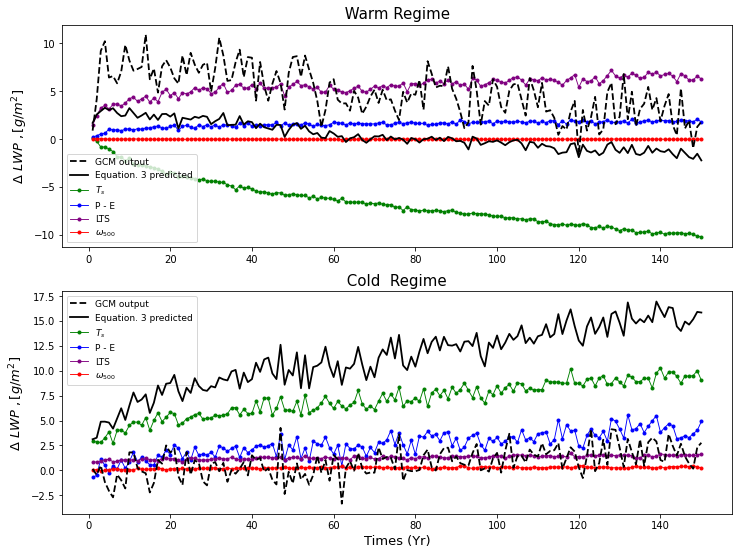

In [12]:
# regime-divided plots for components' contribution

parameters = {'axes.labelsize': 13, 'legend.fontsize': 9, 
          'axes.titlesize': 15, 'xtick.labelsize':10, 'ytick.labelsize':10}

plt.rcParams.update(parameters)

Regimes = 2
CCFs = 4
time = np.arange(1, 151)

# individual components:
predict_label_LWP1 =  predict_dict1['label'] *1
predict_value_LWP1 =  deepcopy(predict_dict1['value'])

predict_label_LWP2 =  predict_dict2['label'] *1
predict_value_LWP2 =  deepcopy(predict_dict2['value'])
# print(predict_dict2['value'])

# total LWP changes:
total_report_LWP1 = output_2lrm_metric_actual_abr[deck_nas2[a]]['LWP'].reshape(shape_mon_abr[deck_nas2[a]]) * 1.  # change the models
total_predict_LWP1 = output_2lrm_mon_bin_LWPpredi_abr[deck_nas2[a]] * 1

total_report_LWP2 = output_2lrm_metric_actual_PI[deck_nas2[a]]['LWP'].reshape(shape_mon_pi[deck_nas2[a]]) * 1.
total_predict_LWP2 = output_2lrm_mon_bin_LWPpredi_PI[deck_nas2[a]] * 1

# define array to store the total and individual components of 4 lrm:
dabrmeanpi_ttimes_ccfsdri_2lrm = full((2, 5, total_report_LWP1.shape[0]), 0.00)
dabrmeanpi_ttimes_report_2lrm = full((2, total_report_LWP1.shape[0]), 0.00)
dabrmeanpi_ttimes_predicted_2lrm = full((2, total_report_LWP1.shape[0]), 0.00)
shape_yr = total_report_LWP1.shape[0]//12   #.. times dimension shapes in annually
##. 'layover_yr' is the data array for storing the 2-d data array for annually-eman:
layover_yr1 = np.zeros((2, 5, shape_yr))
layover_yr2 = np.zeros((2, shape_yr))
layover_yr3 = np.zeros((2, shape_yr))


for i in arange(0, Regimes, 1):
    
    ind_notregime_PI = predict_label_LWP2 != (i+1)
    
    ind_notregime_abr = predict_label_LWP1 != (i+1)
    # print(ind_notregime_abr)
    
    total_report_LWP_PI = total_report_LWP2 *1
    total_report_LWP_abr = total_report_LWP1 *1
    total_predict_LWP_PI = total_predict_LWP2 *1
    total_predict_LWP_abr = total_predict_LWP1 *1
    
    total_report_LWP_PI[ind_notregime_PI] = np.nan
    total_report_LWP_abr[ind_notregime_abr] = np.nan
    total_predict_LWP_PI[ind_notregime_PI] = np.nan
    total_predict_LWP_abr[ind_notregime_abr] = np.nan
    
    predict_value_LWP_PI = deepcopy(predict_value_LWP2)
    predict_value_LWP_abr = deepcopy(predict_value_LWP1)
    
    dabrmeanpi_ttimes_report_2lrm[i,:] = 1000.* (nanmean(total_report_LWP_abr[:,:,:], axis = (1,2)) - nanmean(total_report_LWP_PI[:,:,:], axis = (0,1,2)))
    dabrmeanpi_ttimes_predicted_2lrm[i,:]  = 1000.* (nanmean(total_predict_LWP_abr[:,:,:], axis = (1,2)) - nanmean(total_predict_LWP_PI[:,:,:], axis = (0,1,2)))
    
    print(dabrmeanpi_ttimes_predicted_2lrm.shape)
    for j in arange(0, (CCFs + 1), 1):

        predict_value_LWP_PI[j][ind_notregime_PI] =  np.nan
        predict_value_LWP_abr[j][ind_notregime_abr] =  np.nan
    
        dabrmeanpi_ttimes_ccfsdri_2lrm[i ,j, :] = (nanmean(predict_value_LWP_abr[j][:,:,:], axis = (1,2)) - nanmean(predict_value_LWP_PI[j][:,:,:], axis = (0,1,2)))
    
for t in range(shape_yr):
    
    layover_yr2[:,t]  =  nanmean(dabrmeanpi_ttimes_report_2lrm[:, t*12:(t+1)*12], axis = 1)
    layover_yr3[:,t]  =  nanmean(dabrmeanpi_ttimes_predicted_2lrm[:, t*12:(t+1)*12], axis = 1)
    
    layover_yr1[:,:, t] =  nanmean(dabrmeanpi_ttimes_ccfsdri_2lrm[:,:, t*12:(t+1)*12], axis= 2)



# Plotting:

fig92, ax92 =  plt.subplots(2, 1, figsize=(6.00 *2, 9.0))

# ------------------ Cold
ax92[1].plot(time, layover_yr2[0,:150],  '--', c ='k', linewidth= 1.8, label='GCM output', zorder = 10)
ax92[1].plot(time, layover_yr3[0,:150], '-', c= 'k', linewidth= 1.8, label='Equation. 3 predicted', zorder = 10)

# ax92[1].plot(time, layover_yr1[0,0,:150], '-', c= 'green', linewidth= 0.9, label='Ts')
ax92[1].plot(time, layover_yr1[0,0,:150] + layover_yr1[0,4,:150], '.-', c = 'green', linewidth = 0.9, label = r"$T_{s}$")

ax92[1].plot(time, layover_yr1[0,1,:150], '.-', c= 'blue',  linewidth=0.9, label='P - E')
ax92[1].plot(time, layover_yr1[0,2,:150], '.-', c= 'purple', linewidth=0.9, label='LTS')
ax92[1].plot(time, layover_yr1[0,3,:150], '.-', c= 'red',  linewidth=0.9, label= r"$\omega_{500}$")
# ax92[1].plot(time, layover_yr1[0,4,:150], '-', c= 'gray',  linewidth=0.9, label='intp')


ax92[1].legend(loc='upper left')
ax92[1].set_xlabel('Times (Yr)')
ax92[1].set_ylabel(r"$ \Delta\ LWP \ ,$" +r"$[g/m^{2}]$")
ax92[1].set_title(" Cold " + " Regime ")

# -----------------  Warm
ax92[0].plot(time, layover_yr2[1,:150],  '--', c ='k', linewidth= 1.8, label='GCM output', zorder = 10)
ax92[0].plot(time, layover_yr3[1,:150], '-', c= 'k', linewidth= 1.8, label='Equation. 3 predicted', zorder = 10)

# ax92[0].plot(time, layover_yr1[1,0,:150], '-', c= 'green', linewidth= 0.9, label='Ts')
ax92[0].plot(time, layover_yr1[1,0,:150] + layover_yr1[1,4,:150], '.-', c = 'green', linewidth = 0.9, label = r"$T_{s}$")

ax92[0].plot(time, layover_yr1[1,1,:150], '.-', c= 'blue',  linewidth=0.9, label='P - E')
ax92[0].plot(time, layover_yr1[1,2,:150], '.-', c= 'purple', linewidth=0.9, label='LTS')
ax92[0].plot(time, layover_yr1[1,3,:150], '.-', c= 'red',  linewidth=0.9, label= r"$\omega_{500}$")
# ax92[0].plot(time, layover_yr1[1,4,:150], '-', c= 'gray',  linewidth=0.9, label='intp')


ax92[0].legend(loc='lower left')
# ax92[0].set_xlabel('Times (Yr)')
ax92[0].set_ylabel(r"$ \Delta\ LWP \ ,$" +r"$[g/m^{2}]$")
ax92[0].set_title(" Warm " + "Regime ")


# plt.show()
# plt.savefig(path6 +"Fig_S5.jpg", bbox_inches = 'tight', dpi = 500)
